# NOTEBOOK 6 M&M color recognition
---

## Introduction
For the M&M sorting machine you need to recognize the color of the M&M to define sorting actions. For this we will use a color sensor. In our case this is the TCS34725 sensor.

This is a so called smart sensor, because the sensor is integrated with a microprocesser which calculates the color (as RGB value) from its sensors. You can also "program" the sensor to set the settings. The sensor is delivering its data on request. 

In the following assignment you will develop a program to detect reliabely and fast the color of a M&M-particle. References to the use of the sensors are made, from which you have to gather information on how to use this sensor with CircuitPython.


## I2C protocol (information only)
To communicate with the sensor a digital protocol is used called I2C (pronounced as “eye-squared-C”). I2C is a synchronous, multi-master/multi-slave (controller/target), single-ended, serial communication bus invented in 1982 by Philips Semiconductors. It is widely used for attaching lower-speed peripheral ICs to processors and microcontrollers in short-distance, intra-board communication. (ref [wikipedia](https://en.wikipedia.org/wiki/I²C))

It's a bus system in which multiple I2C sensors can connect to the same line (wires). Messages are used to communicate with each sensor with defined protocols. Each sensor has an unique ID so messages don't get mixed up.

I2C is not the only protocol. SPI, UART are others, but for now we focus on I2C.

An example schematic with one controller (a microcontroller), three target nodes (an ADC, a DAC, and a microcontroller), and pull-up resistors Rp. To communicatie 2 datalines are used (called SDA en SCL). With voltage and ground are in total 4 wires used (the pull-up resistor are part of the TCS34725 color sensor)
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/I2C_controller-target.svg/1024px-I2C_controller-target.svg.png)

(ref [wikipedia](https://en.wikipedia.org/wiki/I²C)

The `Feather M4` board has specific pins that can be used for the I2C protocol. See wiring scheme below.


## The TCS37245


The TCS37245 sensor is build on a so called breakout board. This breakout board contains the I2C interface pins and power regulators. The sensor we use is from Adafruit. See [link](https://learn.adafruit.com/adafruit-color-sensors/overview) for wiring information and example codes.

From Adafruit: 
> Your electronics can now see in dazzling color with this lovely color light sensor. We found the best color sensor on the market, the TCS34725, which has RGB and Clear light sensing elements. An IR blocking filter, integrated on-chip and localized to the color sensing photodiodes, minimizes the IR spectral component of the incoming light and allows color measurements to be made accurately. The filter means you'll get much truer color than most sensors, since humans don't see IR. The sensor also has an incredible 3,800,000:1 dynamic range with adjustable integration time and gain so it is suited for use behind darkened glass.

> We add supporting circuitry as well, such as a 3.3V regulator so you can power the breakout with 3-5VDC safely and level shifting for the I2C pins so they can be used with 3.3V or 5V logic. Finally, we specified a nice neutral 4150°K temperature LED with a MOSFET driver onboard to illuminate what you're trying to sense. The LED can be easily turned on or off by any logic level output.

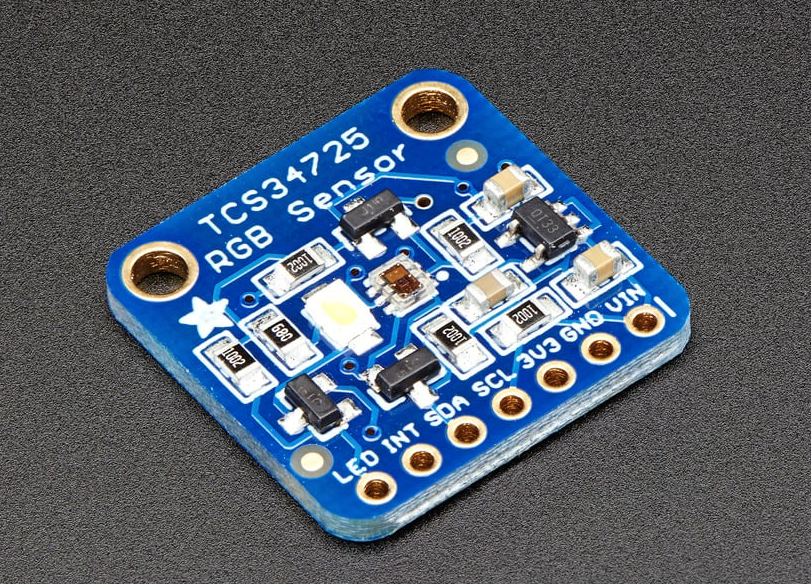

## Wiring

To wire the sensor use the I2C connector on the Feather Shield. Use pin VIN GND SCL and SDA. To control the white LED you need to wire the LED pin to a D-pin of choice.
![figure](https://cdn-learn.adafruit.com/assets/assets/000/048/752/medium800/light_m0_tcs34725_bb.png?1534275460)


## CircuitPython and functionality

To use the sensor with CircuitPython be sure that the library `adafruit_tcs34725.mpy` is installed in het lib folder. 

Example scripts and function to read data or to config the sensor are described in the [Adafruit TCS37245 link](https://learn.adafruit.com/adafruit-color-sensors/python-circuitpython#circuitpython-and-python-usage-2976709). Use this information to use the sensor.


You can read values from the sensor using any of these properties:
- color_rgb_bytes - A 3-tuple of the red, green, blue color values.  These are returned as bytes from 0 to 255 (0 is low intensity, 255 is maximum intensity).
- color_temperature - The color temperature in Kelvin detected by the sensor.  This is computed from the color and might not be super accurate!
- lux - The light intensity in lux detected by the sensor.  This is computed from the color and might not be super accurate!

In addition there are some properties you can both read and write to change how the sensor behaves:
- integration_time - The integration time of the sensor in milliseconds.  Must be a value between 2.4 and 614.4. This is the "measure time"
- gain - The gain of the sensor, must be a value of 1, 4, 16, 60.

To control the build in LED a separate wire is needed from the `LED-pin` to any digital pin. 

### Neopixel

The Feather board is equipped with a so called neopixel. A neopixel is a color LED which you control with RGB (Red-Green-Blue) values. “NeoPixel” is Adafruit’s brand for individually-addressable RGB color pixels and strips based on the WS2812, WS2811 and SK6812 LED/drivers, using a single-wire control protocol. See https://learn.adafruit.com/adafruit-neopixel-uberguide/the-magic-of-neopixels for some background information. In the references multiple NeoPixels are used. Sadly, in our setting it is just one :-( 

To use this Neopixel in CircuitPython separate libraries in the lib folder are needed (already included in the lib folder). See for https://learn.adafruit.com/adafruit-feather-m4-express-atsamd51/circuitpython-neopixel detailled information about the use of the library. Below an example program

In [ ]:
import time
import board
import neopixel # library for driving the Neo-pixel Put it in the lib folder

Define the variable led as a NeoPixel object. We have just one attached to board.NEOPIXEL.

In [ ]:
pixel_pin = board.NEOPIXEL
num_pixels = 1
led = neopixel.NeoPixel(pixel_pin, num_pixels) # only one 


Now the object is defined, the brightness can be set and a RGB-colour is assigned. The first led is `led[0]`

In [ ]:
led.brightness = 0.3
led[0] = (0, 255, 0) #tuples
time.sleep(0.5)
led[0] = (255, 0, 0)
time.sleep(0.5)
# etc

## Introduction to the assignement
The M&M sorting machine must be able to recogineze the color of the M&M and decide in what bin to put the M&M (as fast as possible!). In the first assignment you will determine the best setting of the integration_time and gain to get a stable output of the sensor. You can use any of the availble outputs. In the second assignment you will develop an algoritme to recognise the (unknown)color or the M&M. M&M's are availble with a little black box to measure the M&M. To have a visual feedback of the measured color, a neopixel is used.

---
### Assignment 1
Use the example script from [Adafruit TCS37245 link](https://learn.adafruit.com/adafruit-color-sensors/python-circuitpython#circuitpython-and-python-usage-2976709) and extent this to print:
- color_rgb_bytes
- color_temperature
- lux

With various setting of integration time and gain for the 6 different M&M colors. Determine the beste settings for your measurements. Use a neopixel to get visual feedback of the measured color

In [ ]:
# =============== YOUR CODE GOES HERE =================

# SPDX-FileCopyrightText: 2021 ladyada for Adafruit Industries
# SPDX-License-Identifier: MIT

# Simple demo of the TCS34725 color sensor.
# Will detect the color from the sensor and print it out every second.
import board, time, neopixel
import adafruit_tcs34725

pixel_pin = board.NEOPIXEL
num_pixels = 1
led = neopixel.NeoPixel(pixel_pin, num_pixels) # only one 

# Create sensor object, communicating over the board's default I2C bus
i2c = board.I2C()  # uses board.SCL and board.SDA
# i2c = board.STEMMA_I2C()  # For using the built-in STEMMA QT connector on a microcontroller
sensor = adafruit_tcs34725.TCS34725(i2c)

# Change sensor integration time to values between 2.4 and 614.4 milliseconds
sensor.integration_time = 3

# Change sensor gain to 1, 4, 16, or 60
sensor.gain = 1

#Main loop reading color and printing it every second.
while True:
    # Raw data from the sensor in a 4-tuple of red, green, blue, clear light component values
    # print(sensor.color_raw)
    
    color = sensor.color
    color_rgb = sensor.color_rgb_bytes
    led[0] = color_rgb
    
    print(
        "RGB color as 8 bits per channel int: #{0:02X} or as 3-tuple: {1}".format(
            color, color_rgb
        )
    )

    # Read the color temperature and lux of the sensor too.
    temp = sensor.color_temperature
    lux = sensor.lux
    print("Temperature: {0}K Lux: {1}\n".format(temp, lux))
    # Delay for a second and repeat.
    time.sleep(1.0)



---
### Assignment 2
Make a CircuitPython algorithm in which you use the TCS37245 color sensor and the results of the previous assignment to detect the right color of the 6 M&M colors. This algorithm you will use in your M&M sorting machine.

Requirements:
- `>95% reliable
- as fast as possible

Experiment with different algoritmes. Make a table (below) to show the results (per color reliability and speed)


In [ ]:
# =============== YOUR CODE GOES HERE =================
# add comments to your code to explain algoritm
import board
import time
import adafruit_tcs34725

def classify_color(rgb):
    red, green, blue = rgb
    red_threshold = 100
    green_threshold = 100
    blue_threshold = 100
    lux = sensor.lux
    # Classify based on thresholds
    if red >= 40 and lux < 1000:
        return "Red"
    elif green > 25:
        return "Green"
    elif blue > 15:
        return "Blue"
    elif red > 20 and green >= 15 and blue > 0 and lux > 500:
        return "Yellow"
    elif red < 40 and green < 30 and blue > 0:
        return "Brown"
    else:
        return "Unknown"


i2c = board.I2C()  # uses board.SCL and board.SDA
sensor = adafruit_tcs34725.TCS34725(i2c)

# Change sensor integration time to values between 2.4 and 614.4 milliseconds
sensor.integration_time = 2.4

# Change sensor gain to 1, 4, 16, or 60
sensor.gain = 1

while True:
    color = sensor.color_rgb_bytes
    color_classification = classify_color(color)
    temp = sensor.color_temperature
    lux = sensor.lux

    print("Detected color:", color_classification)
    print("RGB: {}".format(color))
    print("Temperature: {0}K Lux: {1}\n".format(temp, lux))
    time.sleep(0.2)




|Color|reliability (%)|
|------|-----|
| red  |   |
|green |   |
|orange|  |
|brown |  |
|yellow|  |
|blue  |  |

Average time per M&M sample: ........s

Weakest color to detect: ...............

